# Magnetic Coins

There are two urns, x and y. And there are 1 million magnetic coins.

First, in each urn, you put one coin.

Now, each following coin is thrown in the air and will be attracted by the magnetic mass of the urns, following:
* Prob(urn_x) = x / (x + y)
* Prob(urn_y) = y / (x + y)

Q: How much are you willing to pay upfront for the urn with the lower amount of coins?

In [138]:
# Libraries
from random import choices
import copy

import pandas as pd
import seaborn as sns


In [129]:
# Settings
n_coins = 10**6

n_samples = 100

urn = {"x":1, "y":1}


In [130]:
# Create dict of samples
urn_simu = {i:copy.deepcopy(urn) for i in range(n_samples)}


In [131]:
# Simulate

for s in range(n_samples):

    for i in range(n_coins - 2):

        # Calc probs
        prob_x = urn_simu[s]["x"] / (urn_simu[s]["x"] + urn_simu[s]["y"])
        prob_y = 1 - prob_x

        # Draw random - (x, y)
        urn_i = choices(["x","y"], weights = (prob_x, prob_y), k=1)

        # Add coin to urn
        urn_simu[s][urn_i[0]] += 1

    

In [132]:
# Transform to dataframe for easier transformation and plotting
df_res = pd.DataFrame.from_dict(urn_simu, orient='index')

df_res["min"] = df_res[["x", "y"]].min(axis = 1)

In [136]:
# Summary statistics
df_res.describe()

,x,y,min
count,100.000000,100.000000,100.000000
mean,457151.350000,542848.650000,253226.870000
std,281247.165845,281247.165845,139436.085535
min,7018.000000,1927.000000,1927.000000
25%,219132.500000,292082.750000,140265.250000
50%,410327.000000,589673.000000,236464.500000
75%,707917.250000,780867.500000,358160.500000
max,998073.000000,992982.000000,498643.000000


<Axes: xlabel='min', ylabel='Count'>

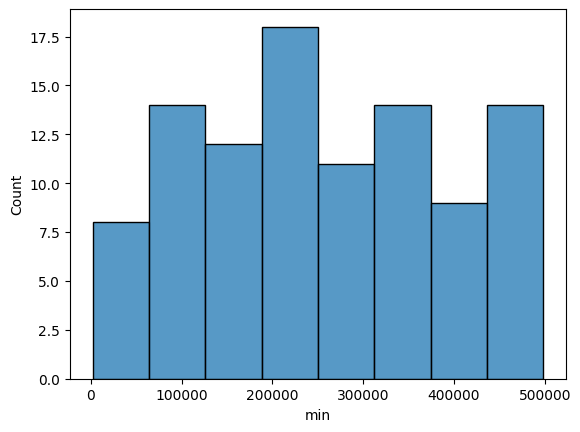

In [137]:
# Inspect results in histogram
sns.histplot(df_res["min"])